IWA_JH ET0 EEMD

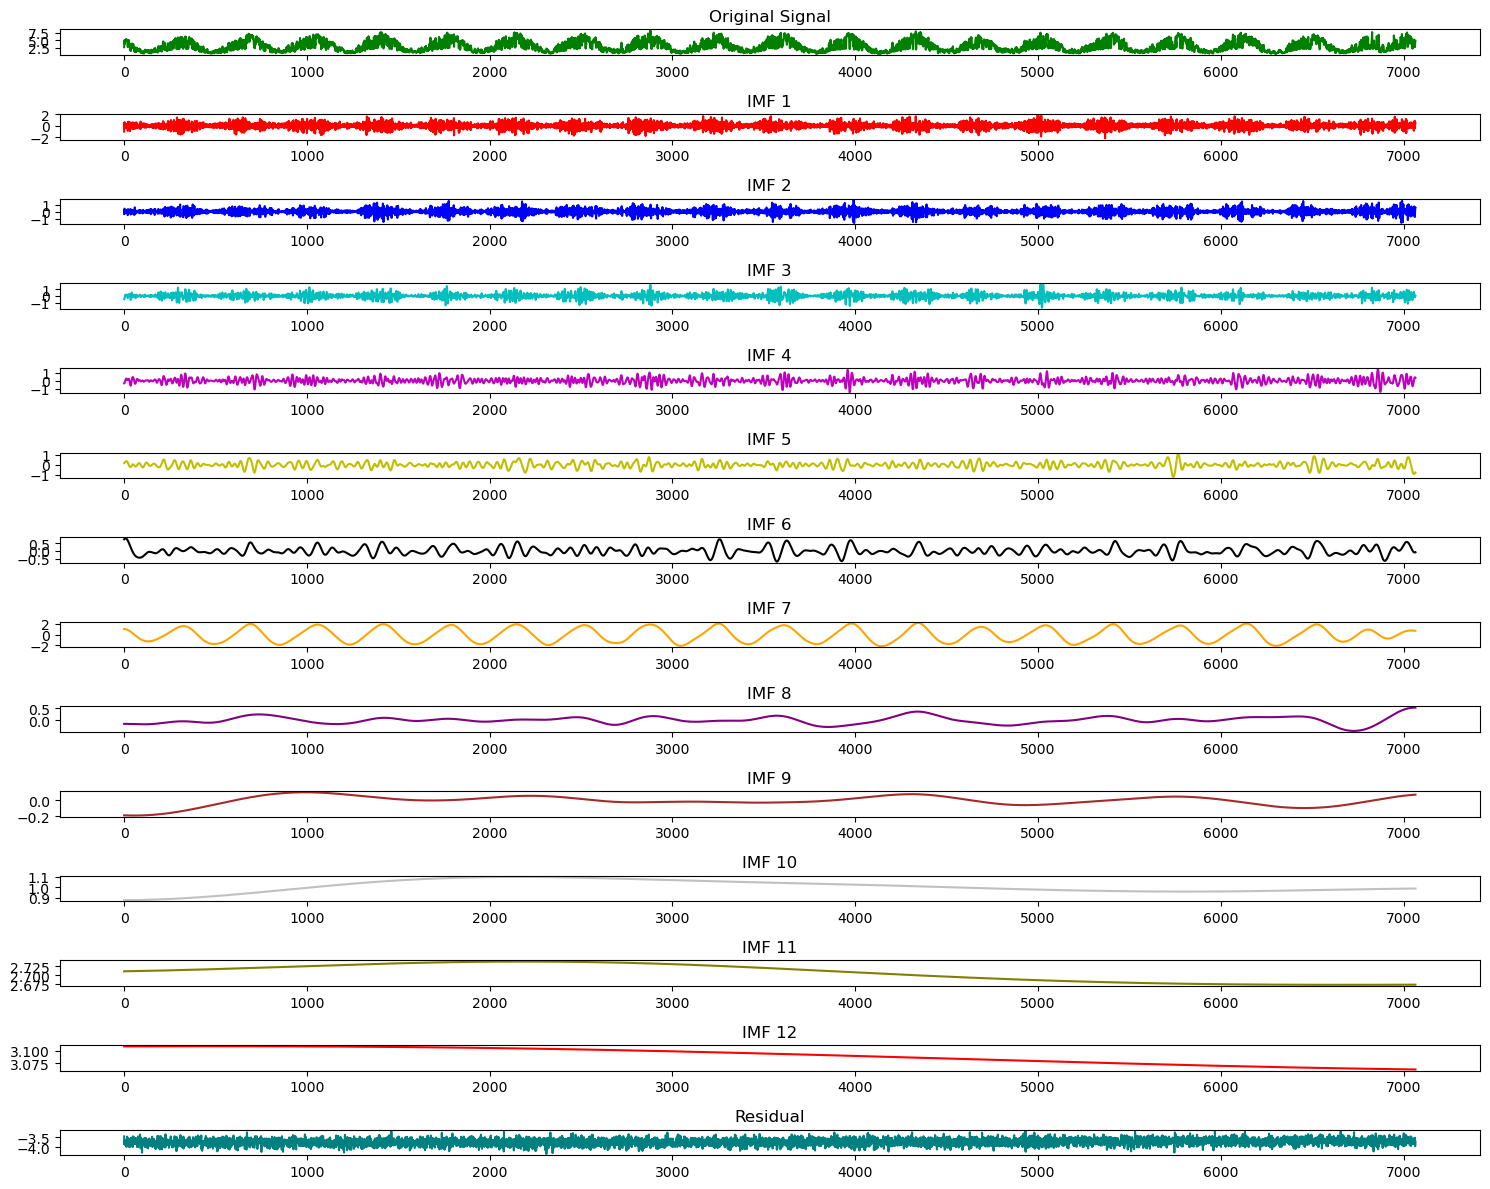

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EEMD

# 读取CSV文件
file_path = r'G:\PaperAssets\IWA_JH\Need_Des_Data\58606\one_day_20years_data_58606.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 选择要分解的列
columns_to_decompose = ['0']

# 提取数据
data = df[columns_to_decompose].values

# 初始化EEMD对象参数 (近似模拟CEEMD)
eemd = EEMD()
eemd.trials = 100  # 集合次数
eemd.noise_width = 0.2  # 噪声幅度

# 定义颜色列表
colors = ['r', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'silver', 'olive']

# 存储结果的DataFrame
result_df = pd.DataFrame()

# 对每列数据进行CEEMD分解
for col_idx, col_name in enumerate(columns_to_decompose):
    signal = data[:, col_idx]
    
    # 调整信号长度为偶数
    if len(signal) % 2 != 0:
        signal = signal[:-1]
    
    # 执行EEMD分解 (模拟CEEMD)
    imfs = eemd.eemd(signal)
    num_imfs = imfs.shape[0]
    
    # 添加IMFs到结果DataFrame
    for i in range(num_imfs):
        result_df[f"{col_name}_IMF_{i+1}"] = imfs[i]
    
    # 计算残差
    residual = signal - np.sum(imfs, axis=0)
    result_df[f"{col_name}_Residual"] = residual
    
    # 绘制结果
    t = np.arange(len(signal))  # 使用数据点索引作为时间轴
    plt.figure(figsize=(15, 12))
    plt.subplot(num_imfs + 2, 1, 1)
    plt.plot(t, signal, 'g')
    plt.title(f"Original Signal")

    for i in range(num_imfs):
        plt.subplot(num_imfs + 2, 1, i + 2)
        plt.plot(t, imfs[i], colors[i % len(colors)])
        plt.title(f"IMF {i+1}")

    plt.subplot(num_imfs + 2, 1, num_imfs + 2)
    plt.plot(t, residual, 'teal')
    plt.title(f"Residual")

    plt.tight_layout()
    plt.show()

# # 保存结果到CSV文件
# result_file_path = 'G:\\TOA_GC\\GCPost-Input\\VMD-GraphCast\\CEEMD_results-station-1d.csv'
# result_df.to_csv(result_file_path, index=False)


In [24]:
def ceemd_iwa_jh(station_id,day):
     # 读取CSV文件
    file_path = rf'G:\PaperAssets\IWA_JH\Need_Des_Data\{station_id}\{day}_day_20years_data_{station_id}.csv'  # 替换为你的CSV文件路径

    df = pd.read_csv(file_path)
    columns_to_decompose = ['0']

    # 提取数据
    data = df[columns_to_decompose].values

    # 初始化EEMD对象参数 (近似模拟CEEMD)
    eemd = EEMD()
    eemd.trials = 100  # 集合次数
    eemd.noise_width = 0.2  # 噪声幅度

    # 定义颜色列表
    colors = ['r', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'silver', 'olive']

    # 存储结果的DataFrame
    result_df = pd.DataFrame()

    # 对每列数据进行CEEMD分解
    for col_idx, col_name in enumerate(columns_to_decompose):
        signal = data[:, col_idx]
        
        # 调整信号长度为偶数
        if len(signal) % 2 != 0:
            signal = signal[:-1]
        
        # 执行EEMD分解 (模拟CEEMD)
        imfs = eemd.eemd(signal)
        num_imfs = imfs.shape[0]
        
        # 添加IMFs到结果DataFrame
        for i in range(num_imfs):
            result_df[f"{col_name}_IMF_{i+1}"] = imfs[i]
        
        # 计算残差
        residual = signal - np.sum(imfs, axis=0)
        result_df[f"{col_name}_Residual"] = residual
        
        # 绘制结果
        t = np.arange(len(signal))  # 使用数据点索引作为时间轴
        plt.figure(figsize=(15, 12))
        plt.subplot(num_imfs + 2, 1, 1)
        plt.plot(t, signal, 'g')
        plt.title(f"Original Signal")

        for i in range(num_imfs):
            plt.subplot(num_imfs + 2, 1, i + 2)
            plt.plot(t, imfs[i], colors[i % len(colors)])
            plt.title(f"IMF {i+1}")

        plt.subplot(num_imfs + 2, 1, num_imfs + 2)
        plt.plot(t, residual, 'teal')
        plt.title(f"Residual")

        plt.tight_layout()
        plt.show()

        # 保存结果到CSV文件
        result_file_path = rf'G:\PaperAssets\IWA_JH\EEMD_Result\{station_id}\CEEMD_{station_id} Station_{day}.xlsx'
        result_df.to_excel(result_file_path, index=False)

In [26]:
day = ['one','three','five','seven','ten','fifteen']
station_id = ['58606','58618','58693']
for sd in station_id:
    for d in day:
        # ceemd_iwa_jh(sd,d)
        
        print('station:',sd)
        print('day:',d)

    print('-------------------')

station: 58606
day: one
station: 58606
day: three
station: 58606
day: five
station: 58606
day: seven
station: 58606
day: ten
station: 58606
day: fifteen
-------------------
station: 58618
day: one
station: 58618
day: three
station: 58618
day: five
station: 58618
day: seven
station: 58618
day: ten
station: 58618
day: fifteen
-------------------
station: 58693
day: one
station: 58693
day: three
station: 58693
day: five
station: 58693
day: seven
station: 58693
day: ten
station: 58693
day: fifteen
-------------------
